In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1]:
batch_size = 64
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Machine_learning/keras/Citrus Plant Dataset/Citrus',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 759 files belonging to 2 classes.
Using 608 files for training.

In [1]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Machine_learning/keras/Citrus Plant Dataset/Citrus',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 759 files belonging to 2 classes.
Using 151 files for validation.

In [1]:
class_names = train_ds.class_names
print(class_names)

['Fruits', 'Leaves']

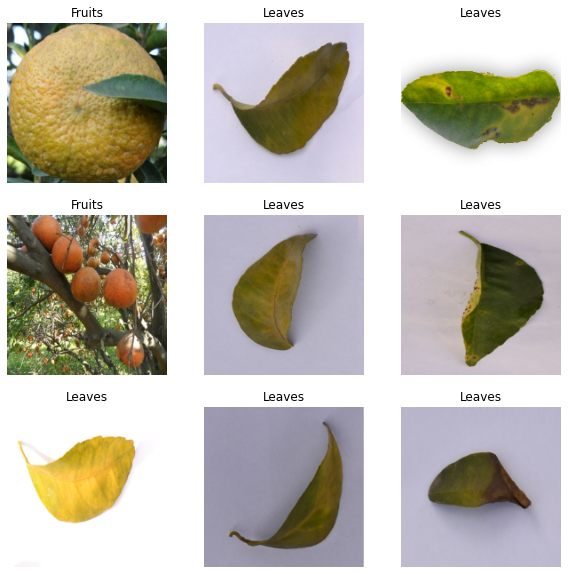

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [1]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)

In [1]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [1]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [1]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.15852289 0.8966803

In [1]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [1]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [1]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [1]:
epochs= 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 4s 173ms/step - loss: 0.4507 - accuracy: 0.8385 - val_loss: 0.0809 - val_accuracy: 0.9735
Epoch 2/10
10/10 [==============================] - 0s 36ms/step - loss: 0.0915 - accuracy: 0.9713 - val_loss: 0.0665 - val_accuracy: 0.9735
Epoch 3/10
10/10 [==============================] - 0s 36ms/step - loss: 0.0570 - accuracy: 0.9741 - val_loss: 0.0717 - val_accuracy: 0.9735
Epoch 4/10
10/10 [==============================] - 0s 36ms/step - loss: 0.0479 - accuracy: 0.9777 - val_loss: 0.0466 - val_accuracy: 0.9868
Epoch 5/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0357 - accuracy: 0.9838 - val_loss: 0.0445 - val_accuracy: 0.9735
Epoch 6/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0364 - accuracy: 0.9823 - val_loss: 0.0531 - val_accuracy: 0.9801
Epoch 7/10
10/10 [==============================] - 0s 36ms/step - loss: 0.0367 - accuracy: 0.9861 - val_loss: 0.0353 - val_accuracy: 0.9868
Epoch 8/10
1

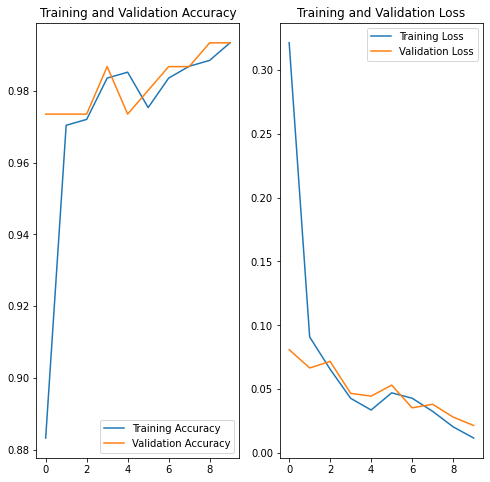

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
img = keras.preprocessing.image.load_img(
   '/content/drive/MyDrive/Machine_learning/keras/citrus_test.jpg' , target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Leaves with a 100.00 percent confidence.

In [1]:
img = keras.preprocessing.image.load_img(
   '/content/drive/MyDrive/Machine_learning/keras/orange_test2.jpg' , target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Fruits with a 60.42 percent confidence.